## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_data = pd.merge(mouse_metadata, study_results, on= 'Mouse ID', how = 'outer')
full_data.head(12)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice in the DataFrame.
mice_number = full_data['Mouse ID'].unique()
len(mice_number)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = full_data[full_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = full_data.loc[full_data['Mouse ID'] == 'g989']
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
full_data_clean = full_data.loc[full_data['Mouse ID'] != 'g989']
full_data_clean.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice = full_data_clean['Mouse ID'].unique()
len(new_mice)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol = full_data_clean[['Drug Regimen', 'Tumor Volume (mm3)']]

mean_drugs = tumor_vol.groupby(['Drug Regimen']).mean()
mean_drugs = mean_drugs.rename(columns= {'Tumor Volume (mm3)': 'Mean Tumor Volume (mm3)'})
mean_drugs['Median Tumor Volume (mm3)'] = tumor_vol.groupby(['Drug Regimen']).median()
mean_drugs['Variance Tumor Volume (mm3)'] = tumor_vol.groupby(['Drug Regimen']).var()
mean_drugs['Std. Dev. Tumor Volume (mm3)'] = tumor_vol.groupby(['Drug Regimen']).std()
mean_drugs['SEM Tumor Volume (mm3)'] = tumor_vol.groupby(['Drug Regimen']).sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_drugs

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std. Dev. Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

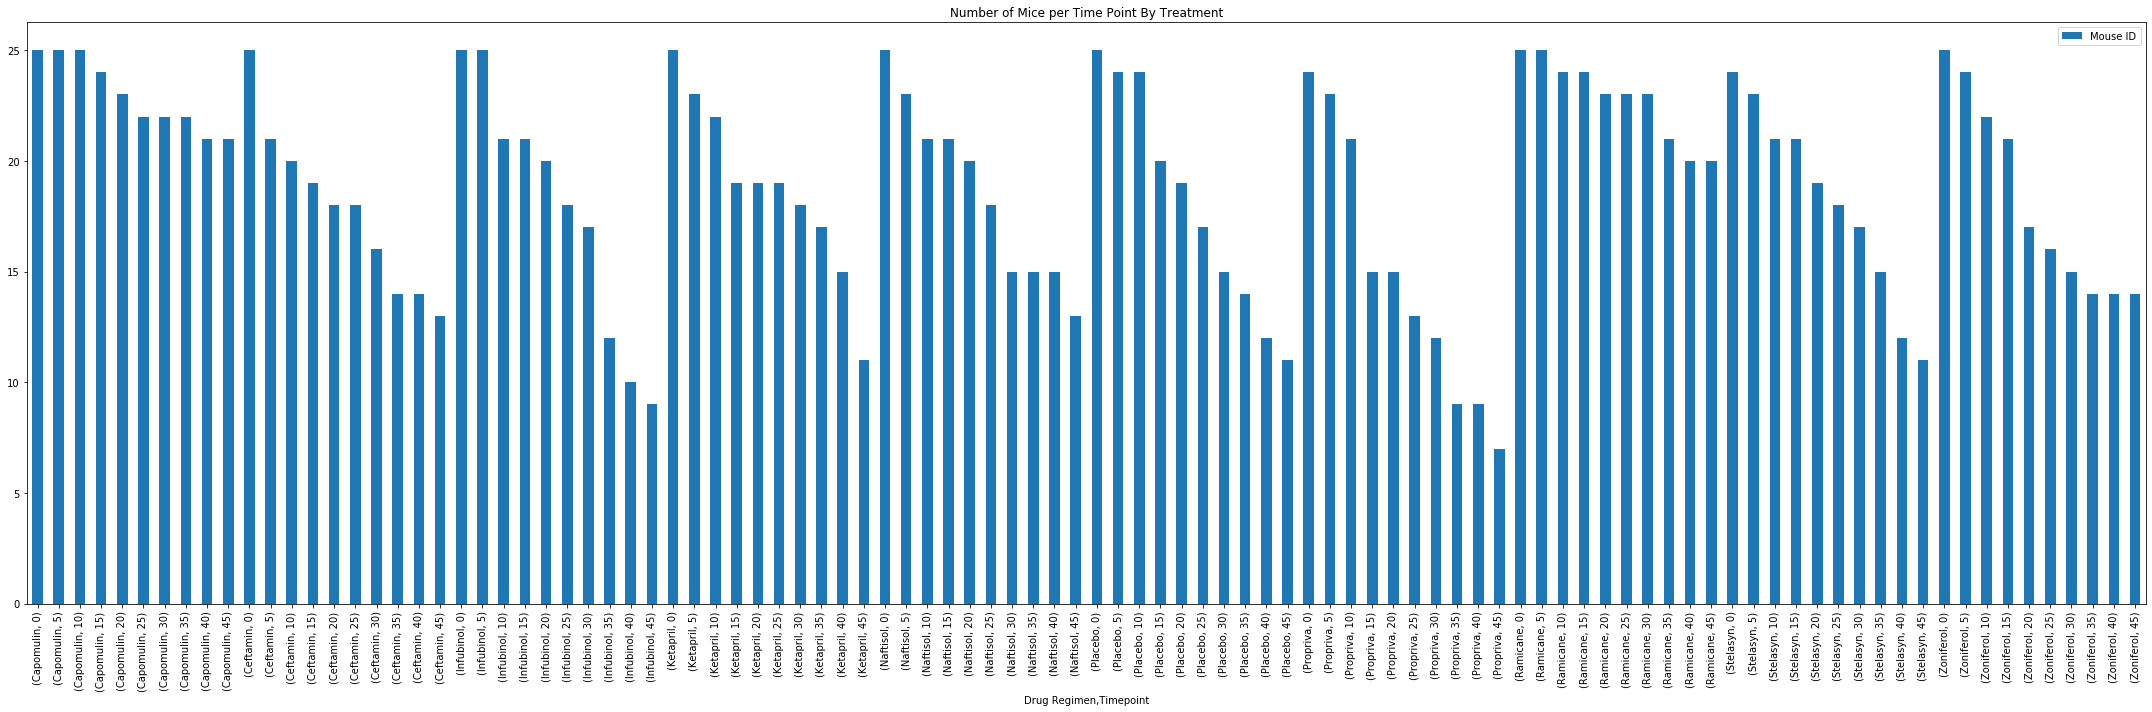

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
time_point = full_data_clean[['Mouse ID', 'Drug Regimen', 'Timepoint']]
per_time_point = time_point.groupby(['Drug Regimen', 'Timepoint'])
per_time_df = per_time_point.count()
per_time_df.plot(kind = 'bar', figsize=(30,10))
plt.title('Number of Mice per Time Point By Treatment')
plt.tight_layout()

In [24]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
mouse_count = per_time_df['Mouse ID']
per_time_df.head()
#x_axis = np.arange(len(per_time_df['Mouse ID']))
#labels = per_time_df.columns()

#labels
#plt.bar(x_axis, mouse_count, color = 'b', align= 'center')
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, 
#plt.xlabel('Drug Regimen, Timepoint')
#plt.title('Number of Mice per Time Point By Treatment')
#plt.legend('Mouse ID')
#plt.tight_layout()

Mouse ID
Drug Regimen Timepoint          
Capomulin    0                25
             5                25
             10               25
             15               24
             20               23

## Pie Plots

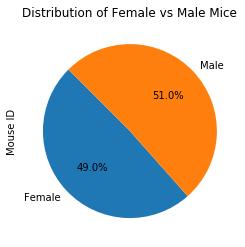

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
group_gender = full_data_clean.groupby(['Sex'])
by_gender_count = group_gender['Mouse ID'].count()
gender = by_gender_count.keys()

by_gender_count.plot(kind = 'pie', y = gender, startangle = 135, autopct='%0.1f%%', title = 'Distribution of Female vs Male Mice')
plt.show()

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#by_sex = full_data_clean['Sex'].value_counts()

#labels = full_data_clean['Sex'].unique()

#by_gender_plot = plt.pie(by_sex, labels, startangle = 135)

#plt.show()

## Quartiles, Outliers and Boxplots

In [219]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#promising_drugs = full_data_clean[full_data_clean['Drug Regimen'].isin(drugs)]
#promising_drugs_final = promising_drugs.drop_duplicates(subset= ['Mouse ID'], keep= 'last')
#capo_final = promising_drugs_final.filter(items = ['Capomulin'])
#capo_final.head()
capo_init = full_data_clean.loc[full_data_clean['Drug Regimen'] == 'Capomulin']
capo_final_vol = capo_init.drop_duplicates(subset= ['Mouse ID'], keep= 'last').set_index(['Mouse ID'])
capo_final_vol_data = capo_final_vol['Tumor Volume (mm3)']
#print(capo_final_vol_data)
capo_quartiles = capo_final_vol_data.quantile([.25, .5, .75])
capolowerq = capo_quartiles[.25]
capoupperq = capo_quartiles[.75]
capo_iqr = capoupperq - capolowerq
capolowerbound = capolowerq - (1.5* capo_iqr)
capoupperbound = capoupperq + (1.5* capo_iqr)
print(capolowerbound)
print(capoupperbound)
capo_outliers1 = capo_final_vol_data >= capoupperbound
capo_outliers2 = capo_final_vol_data <= capolowerbound
#print(capo_outliers1)
#print(capo_outliers2)

20.70456164999999
51.83201549


In [220]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
infu_init = full_data_clean.loc[full_data_clean['Drug Regimen'] == 'Infubinol']
infu_final_vol = infu_init.drop_duplicates(subset= ['Mouse ID'], keep= 'last').set_index(['Mouse ID'])
infu_final_vol_data = infu_final_vol['Tumor Volume (mm3)']
#print(infu_final_vol_data)
infu_quartiles = infu_final_vol_data.quantile([.25, .5, .75])
infulowerq = infu_quartiles[.25]
infuupperq = infu_quartiles[.75]
infu_iqr = infuupperq - infulowerq
infulowerbound = infulowerq - (1.5* infu_iqr)
infuupperbound = infuupperq + (1.5* infu_iqr)
print(infulowerbound)
print(infuupperbound)
infu_outliers1 = infu_final_vol_data >= infuupperbound
infu_outliers2 = infu_final_vol_data <= infulowerbound
#print(infu_outliers1)
#print(infu_outliers2)

36.83290494999999
82.74144559000001


In [221]:
rami_init = full_data_clean.loc[full_data_clean['Drug Regimen'] == 'Ramicane']
rami_final_vol = rami_init.drop_duplicates(subset= ['Mouse ID'], keep= 'last').set_index(['Mouse ID'])
rami_final_vol_data = rami_final_vol['Tumor Volume (mm3)']
#print(capo_final_vol_data)
rami_quartiles = rami_final_vol_data.quantile([.25, .5, .75])
ramilowerq = rami_quartiles[.25]
ramiupperq = rami_quartiles[.75]
rami_iqr = ramiupperq - ramilowerq
ramilowerbound = ramilowerq - (1.5* rami_iqr)
ramiupperbound = ramiupperq + (1.5* rami_iqr)
print(ramilowerbound)
print(ramiupperbound)
rami_outliers1 = rami_final_vol_data >= ramiupperbound
rami_outliers2 = rami_final_vol_data <= ramilowerbound
#print(rami_outliers1)
#print(rami_outliers2)

17.912664470000003
54.30681135


In [222]:
cef_init = full_data_clean.loc[full_data_clean['Drug Regimen'] == 'Ceftamin']
cef_final_vol = cef_init.drop_duplicates(subset= ['Mouse ID'], keep= 'last').set_index(['Mouse ID'])
cef_final_vol_data = cef_final_vol['Tumor Volume (mm3)']
#print(cef_final_vol_data)
cef_quartiles = cef_final_vol_data.quantile([.25, .5, .75])
ceflowerq = cef_quartiles[.25]
cefupperq = cef_quartiles[.75]
cef_iqr = cefupperq - ceflowerq
ceflowerbound = ceflowerq - (1.5* cef_iqr)
cefupperbound = cefupperq + (1.5* cef_iqr)
print(ceflowerbound)
print(cefupperbound)
cef_outliers1 = cef_final_vol_data >= cefupperbound
cef_outliers2 = cef_final_vol_data <= ceflowerbound
#print(cef_outliers1)
#print(cef_outliers2)

25.355449580000002
87.66645829999999


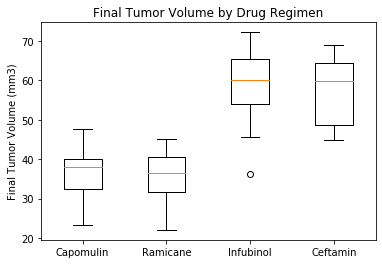

In [234]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1,= plt.subplots()
box_whisk = plt.boxplot([capo_final_vol_data, rami_final_vol_data, infu_final_vol_data, cef_final_vol_data], 
            labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
#ax1.boxplot(capo_final_vol_data)
#ax2.boxplot(rami_final_vol_data)
plt.show()

## Line and Scatter Plots

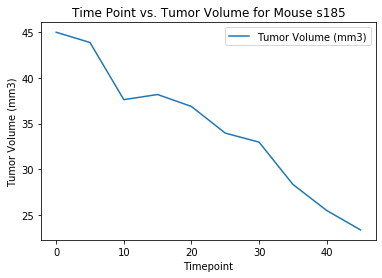

In [246]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse = 's185'
one_mouse = full_data_clean.loc[full_data_clean['Mouse ID'] == mouse]
one_mouse = one_mouse[['Timepoint', 'Tumor Volume (mm3)']].set_index('Timepoint')
one_mouse
one_mouse.plot(kind = 'line')
plt.title('Time Point vs. Tumor Volume for Mouse s185')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


In [252]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


#capo_scatter = capo_init.plot(kind = 'scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)')


30.320479266152176

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
